In [66]:
from ipywidgets import interact, widgets, VBox, HBox, Output, FloatSlider, Dropdown
from plotly import colors
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff

### Bar chart using plotly.graph_objects.

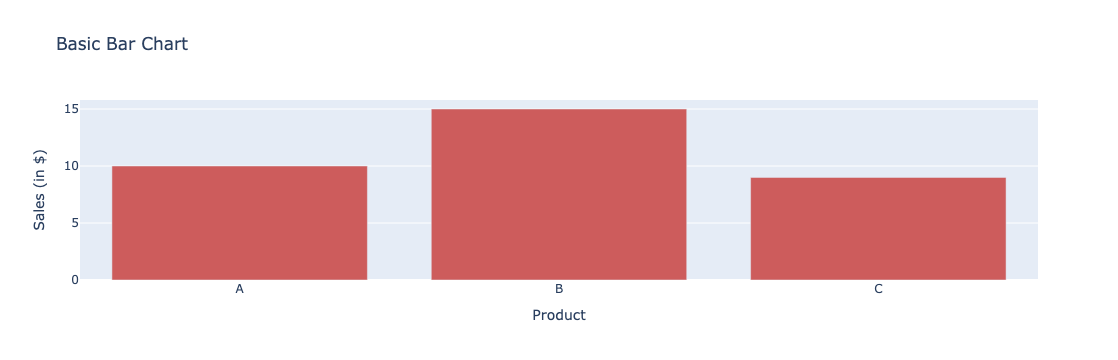

In [66]:
figb = go.Figure(data=[go.Bar(x=['A','B','C'], y=[10,15,9], marker_color='indianred')])
figb.update_layout(title='Basic Bar Chart', xaxis_title='Product',yaxis_title='Sales (in $)')
figb.show()

#### Notes

* plotly.graph_objects (or go) is the core engine of Plotly.

* Every chart is built as a Figure containing one or more Traces (go.Bar, go.Scatter, go.Pie, etc.).

* You manually define every element — data, color, title, axes, etc.

### Bar chart using plotly.express.

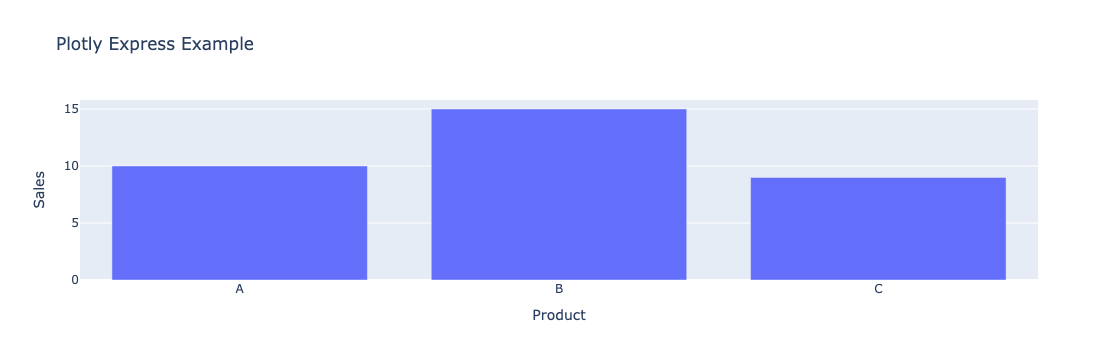

In [50]:
df = pd.DataFrame({'Product':['A','B','C'],'Sales':[10,15,9]})
figb2 = px.bar(df, x='Product', y='Sales', title='Plotly Express Example')
figb2.show()

### Scatter plot using plotly.graph_objects.

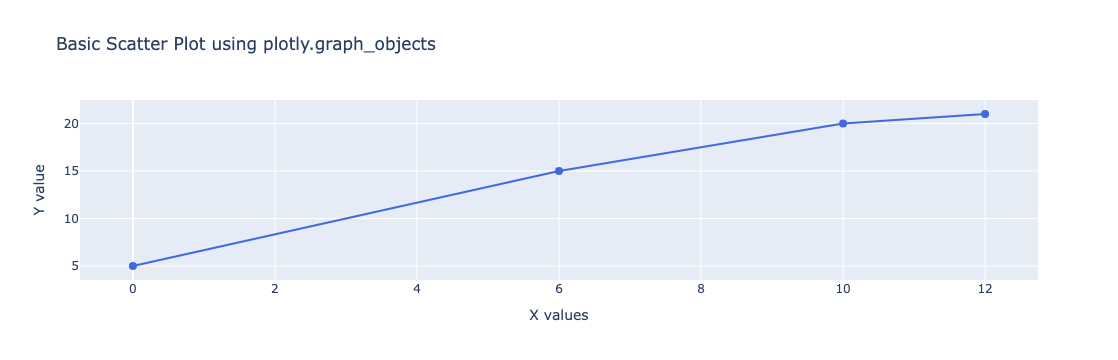

In [18]:
figs = go.Figure()
figs.add_trace(go.Scatter(x=[0, 6, 10, 12], y=[5, 15, 20, 21],mode='lines+markers', marker=dict(size=8, color='royalblue'), 
                line=dict(color='royalblue'),
                name='Sample'))
figs.update_layout(title='Basic Scatter Plot using plotly.graph_objects',xaxis_title='X values',yaxis_title='Y value')
figs.show()

### Scatter plot using plotly.express.

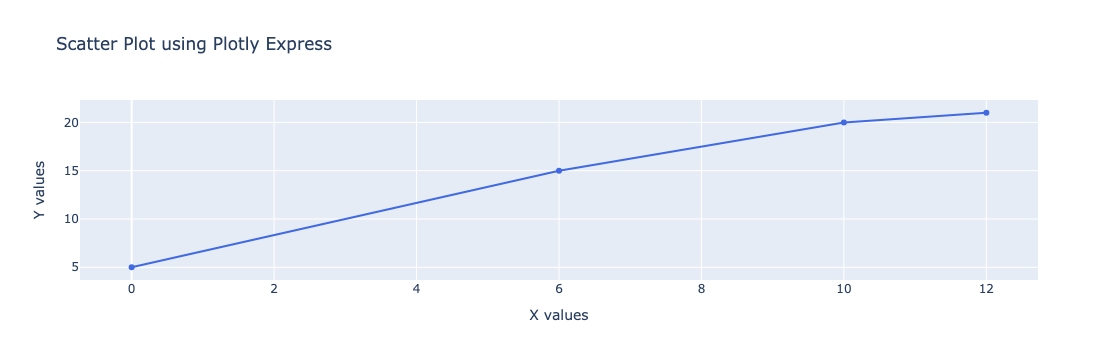

In [16]:
x=[0, 6, 10, 12]
y=[5, 15, 20, 21]

df2 = pd.DataFrame({'x': x, 'y': y})

figs2 = px.scatter(df2, x='x', y='y', title='Scatter Plot using Plotly Express',labels={'x': 'X values', 'y': 'Y values'},
                  color_discrete_sequence=['royalblue'])
figs2.update_traces(mode='lines+markers', line=dict(color='royalblue', width=2))
figs2.show()

### Adding interactivity with "ipywidgets"

In [24]:
def plot_sine(frequency=1.0):
    x = np.linspace(0, 10, 100) # Build the x axis (100 points 0..10)
    y = np.sin(frequency * x)   # Build the y axis (sin(f·x))
    figs3 = go.Figure(go.Scatter(x=x, y=y, mode='lines', line=dict(color='royalblue'))) # Create a Plotly figure (line)
    figs3.update_layout(title=f"Sine wave with frequency = {frequency}",
                      xaxis_title="x", yaxis_title="sin(f·x)", template="plotly_white") # Titles / styling
    figs3.show()  # Render the figure

interact(plot_sine, frequency=widgets.FloatSlider(value=1.0, min=0.5, max=5, step=0.1)) # Create a UI slider bound to the function

interactive(children=(FloatSlider(value=1.0, description='frequency', max=5.0, min=0.5), Output()), _dom_class…

<function __main__.plot_sine(frequency=1.0)>

### Creating a Custom Layout (VBox / HBox)

In [44]:
df_sales = pd.read_csv("consumer_goods_sales.csv", parse_dates=["invoice_date","delivery_date"])
#reads the CSV, parse_dates=[...] converts those columns to actual datetime64

years = sorted(df_sales['year'].unique().tolist()) #all distinct years in ascending order.
regions = ['All'] + sorted(df_sales['region'].unique().tolist()) # adds a "All" choice on top of the real regions. Selecting "All" means “don’t filter by region”.

dd_year = Dropdown(options=years, value=years[-1], description='Year:') #defaults to the last year in the data.
dd_region = Dropdown(options=regions, value='All', description='Region:') #defaults to "All".
out = Output() #prevents duplicate charts from stacking.

def refresh(_=None):
    out.clear_output() #clears whatever is currently in out.
    d = df_sales[df_sales['year'] == dd_year.value] #Filters the DataFrame to the selected year
    if dd_region.value != 'All': #Applies the region filter only if you didn’t pick "All"
        d = d[d['region'] == dd_region.value]
    g = d.groupby('business_unit', as_index=False)['revenue'].sum() #Aggregates revenue by Business Unit
    fig = px.bar(g, x='business_unit', y='revenue', title=f"Revenue by BU — {dd_year.value}",
                 template='plotly_white')
    with out:
        fig.show()

dd_year.observe(refresh, names='value')
dd_region.observe(refresh, names='value')
refresh() #value changes on both dropdowns.
VBox([HBox([dd_year, dd_region]), out])#Builds the UI layout, year and region dropdowns side-by-side.

### Exploring Plotly Extensions

#### Subplots

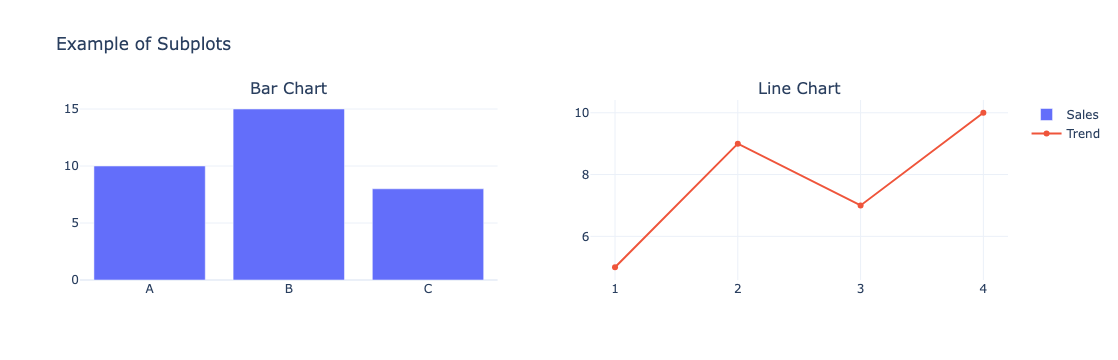

In [59]:
figsp = make_subplots(rows=1, cols=2, subplot_titles=("Bar Chart", "Line Chart"))
figsp.add_trace(go.Bar(x=['A','B','C'], y=[10,15,8], name="Sales"), row=1, col=1)
figsp.add_trace(go.Scatter(x=[1,2,3,4], y=[5,9,7,10], mode='lines+markers', name="Trend"), row=1, col=2)

figsp.update_layout(title="Example of Subplots", template="plotly_white")
figsp.show()

#### Save plots as HTML

In [54]:
fightml = go.Figure(go.Bar(x=['Q1','Q2','Q3','Q4'], y=[300,400,350,500]))
fightml.update_layout(title="Quarterly Sales")

# Save as interactive HTML
pio.write_html(fig, file='quarterly_sales.html', auto_open=False)

#### Creating a distribution plot such as Histograms

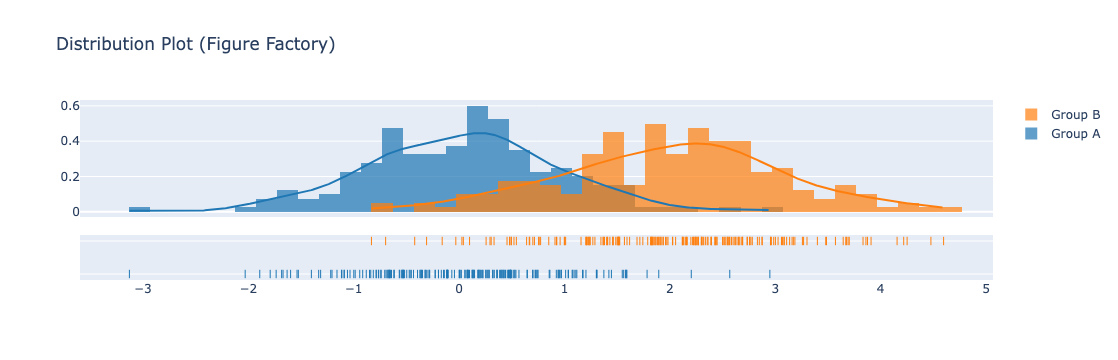

In [63]:
x1 = np.random.normal(0, 1, 200)
x2 = np.random.normal(2, 1, 200)
hist_data = [x1, x2]
group_labels = ['Group A', 'Group B']

figh = ff.create_distplot(hist_data, group_labels, bin_size=[.2, .2])
figh.update_layout(title='Distribution Plot (Figure Factory)')
figh.show()

#### Colors

Sequential: ['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786']
Diverging: ['rgb(103,0,31)', 'rgb(178,24,43)', 'rgb(214,96,77)', 'rgb(244,165,130)', 'rgb(253,219,199)']


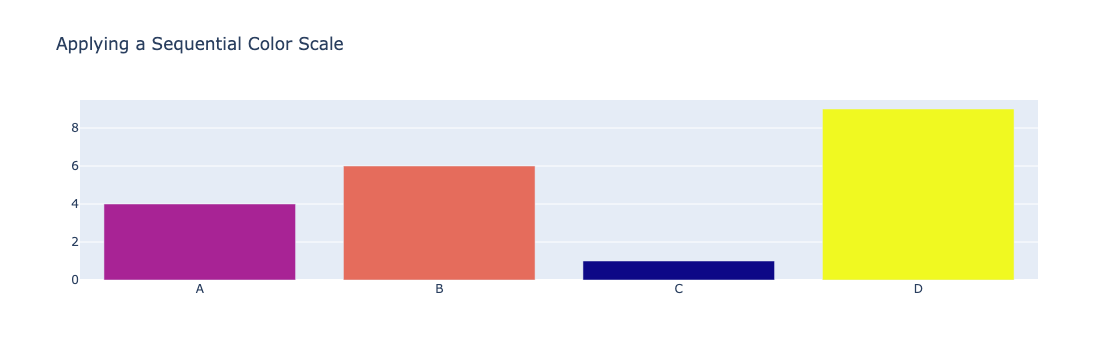

In [73]:
print("Sequential:", colors.sequential.Plasma[:5]) #list of hex color codes from the Plasma sequential palette, first five colors.
print("Diverging:", colors.diverging.RdBu[:5]) #Diverging color scale from red to blue, first five colors.

figc = go.Figure(data=[go.Bar(x=['A','B','C','D'], y=[4,6,1,9],marker=dict(color=[4,6,1,9],colorscale=colors.sequential.Plasma))])
figc.update_layout(title="Applying a Sequential Color Scale")
figc.show()